# Labwork 2 : Regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
f = open("data/data-regression.csv")

f.readline()  # skip the header line (X,Y)
data = np.loadtxt(f, delimiter=',')

print(data)

[[  3.8462   5.3205]
 [  7.4359  11.859 ]
 [  8.7179  20.3205]
 [  9.2308  44.9359]
 [ 12.0513  12.2436]
 [ 13.8462  23.0128]
 [ 14.8718  29.5513]
 [ 15.8974  38.3974]
 [ 18.9744  41.4744]
 [ 19.7436  33.7821]
 [ 22.0513  53.3974]
 [ 22.0513  46.0897]
 [ 25.1282  36.859 ]
 [ 28.2051  53.3974]
 [ 29.4872  40.3205]
 [ 31.0256  61.859 ]
 [ 34.6154  58.0128]
 [ 36.1538  66.859 ]
 [ 37.9487  51.4744]
 [ 41.7949  61.4744]
 [ 44.8718  71.4744]
 [ 47.6923  65.7051]
 [ 51.7949  61.0897]
 [ 51.0256  69.5513]
 [ 56.1538  66.4744]
 [ 56.4103  58.0128]
 [ 62.3077  59.5513]
 [ 68.2051  67.2436]
 [ 65.1282  54.1667]
 [ 70.2564  87.2436]
 [ 70.5128  52.6282]
 [ 75.1282  60.3205]
 [ 75.8974  46.859 ]
 [ 75.8974  69.9359]
 [ 78.9744  64.9359]
 [ 79.7436  74.5513]
 [ 81.2821  38.0128]
 [ 81.2821  48.0128]
 [ 82.0513  83.0128]
 [ 84.1026  64.5513]
 [ 86.1538  72.6282]
 [ 87.6923  57.6282]
 [ 91.5385  83.3974]
 [ 92.5641  69.5513]
 [ 94.359   23.7821]
 [ 99.2308  58.3974]
 [ 99.7436  89.1667]]


In [4]:
data.shape

(47, 2)

[0, 100, 0, 100]

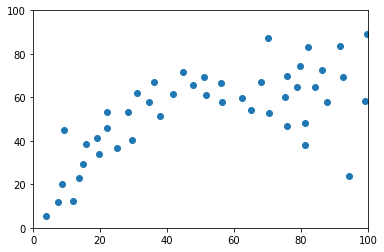

In [5]:
plt.scatter(data[:,0], data[:,1])
plt.axis([0, 100, 0, 100])

[0, 100, 0, 100]

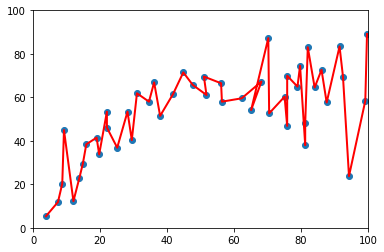

In [6]:
plt.scatter(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,1], color='red', linewidth=2)
plt.axis([0, 100, 0, 100])

In [36]:
X = data[:,0]
Y = data[:,1]
print(X)
print(Y)

[  3.8462   7.4359   8.7179   9.2308  12.0513  13.8462  14.8718  15.8974
  18.9744  19.7436  22.0513  22.0513  25.1282  28.2051  29.4872  31.0256
  34.6154  36.1538  37.9487  41.7949  44.8718  47.6923  51.7949  51.0256
  56.1538  56.4103  62.3077  68.2051  65.1282  70.2564  70.5128  75.1282
  75.8974  75.8974  78.9744  79.7436  81.2821  81.2821  82.0513  84.1026
  86.1538  87.6923  91.5385  92.5641  94.359   99.2308  99.7436]
[  5.3205  11.859   20.3205  44.9359  12.2436  23.0128  29.5513  38.3974
  41.4744  33.7821  53.3974  46.0897  36.859   53.3974  40.3205  61.859
  58.0128  66.859   51.4744  61.4744  71.4744  65.7051  61.0897  69.5513
  66.4744  58.0128  59.5513  67.2436  54.1667  87.2436  52.6282  60.3205
  46.859   69.9359  64.9359  74.5513  38.0128  48.0128  83.0128  64.5513
  72.6282  57.6282  83.3974  69.5513  23.7821  58.3974  89.1667]


In [37]:
X = X.reshape(-1, 1)
print(X)

[[  3.8462]
 [  7.4359]
 [  8.7179]
 [  9.2308]
 [ 12.0513]
 [ 13.8462]
 [ 14.8718]
 [ 15.8974]
 [ 18.9744]
 [ 19.7436]
 [ 22.0513]
 [ 22.0513]
 [ 25.1282]
 [ 28.2051]
 [ 29.4872]
 [ 31.0256]
 [ 34.6154]
 [ 36.1538]
 [ 37.9487]
 [ 41.7949]
 [ 44.8718]
 [ 47.6923]
 [ 51.7949]
 [ 51.0256]
 [ 56.1538]
 [ 56.4103]
 [ 62.3077]
 [ 68.2051]
 [ 65.1282]
 [ 70.2564]
 [ 70.5128]
 [ 75.1282]
 [ 75.8974]
 [ 75.8974]
 [ 78.9744]
 [ 79.7436]
 [ 81.2821]
 [ 81.2821]
 [ 82.0513]
 [ 84.1026]
 [ 86.1538]
 [ 87.6923]
 [ 91.5385]
 [ 92.5641]
 [ 94.359 ]
 [ 99.2308]
 [ 99.7436]]


In [38]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

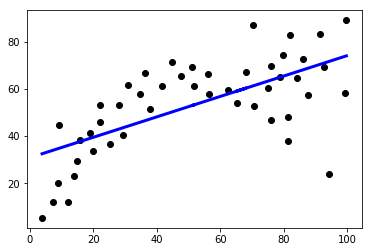

In [39]:
Y_pred = regr.predict(X)

plt.scatter(X, Y,  color='black')
plt.plot(X, Y_pred, color='blue', linewidth=3)

plt.show()

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

poly =  make_pipeline(PolynomialFeatures(degree=3), Ridge())

poly.fit(X, Y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

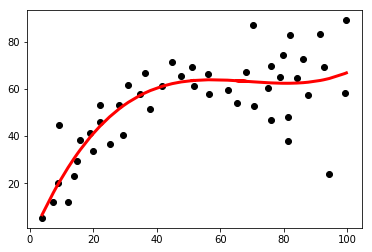

In [41]:
Y_pred2 = poly.predict(X)

plt.scatter(X, Y,  color='black')
plt.plot(X, Y_pred2, color='red', linewidth=3)

plt.show()

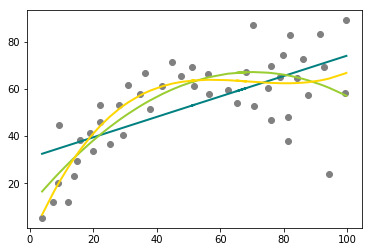

In [42]:
colors = ['teal', 'yellowgreen', 'gold']
plt.scatter(X, Y,  color='gray')

for count, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, Y)
    y_plot = model.predict(X)
    plt.plot(X, y_plot, color=colors[count], linewidth=2,
             label="degree %d" % degree)
    
plt.show()